In [65]:
import torch

# use a GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Set default tensor type to float64
torch.set_default_dtype(torch.float64)

In [66]:
from botorch.utils.sampling import draw_sobol_samples
from botorch.optim import optimize_acqf
import matplotlib.pyplot as plt

In [67]:
seed = 42
# Set the seed for reproducibility
torch.manual_seed(seed)

In [68]:
import torch
import gpytorch
from botorch.models import SingleTaskGP
from gpytorch.likelihoods import FixedNoiseGaussianLikelihood
from gpytorch.means import ConstantMean
from gpytorch.kernels import MaternKernel, ScaleKernel

# Example Usage for 1D
dim = 1

# Define your kernel
nu = 2.5
lengthscale = 0.1
outputscale = 1.0
base_kernel = MaternKernel(nu=nu).double()
base_kernel.lengthscale = torch.tensor([[lengthscale]])
base_kernel.raw_lengthscale.requires_grad = False
scale_kernel = ScaleKernel(base_kernel).double()
scale_kernel.outputscale = torch.tensor([[outputscale]])
scale_kernel.raw_outputscale.requires_grad = False

# Define Noise Level
noise_level = 1e-4

# Initialize Placeholder Data with Correct Dimensions
num_samples = 1  # Replace with actual number of samples
num_features = 1  # Replace with actual number of features
train_X = torch.tensor([[0.0], [0.3], [0.7], [1.0]])  # Placeholder data
train_Y = torch.tensor([[0.7], [0.2], [-1.2], [0.4]])             # Placeholder data
Yvar = torch.ones(num_samples) * noise_level

# Initialize Model
model = SingleTaskGP(train_X, train_Y, likelihood = FixedNoiseGaussianLikelihood(noise=Yvar), covar_module=scale_kernel)

/Users/qianxie/Desktop/Curriculum/Graduate/Research/PandoraBayesOPT/pandorabayesopt_env/lib/python3.9/site-packages/botorch/models/utils/assorted.py:202: InputDataWarning: Input data is not standardized (mean = tensor([0.0250]), std = tensor([0.8421])). Please consider scaling the input to zero mean and unit variance.
  warnings.warn(msg, InputDataWarning)


In [69]:
model.eval()

SingleTaskGP(
  (likelihood): FixedNoiseGaussianLikelihood(
    (noise_covar): FixedGaussianNoise()
  )
  (mean_module): ConstantMean()
  (covar_module): ScaleKernel(
    (base_kernel): MaternKernel(
      (raw_lengthscale_constraint): Positive()
    )
    (raw_outputscale_constraint): Positive()
  )
)

/Users/qianxie/Desktop/Curriculum/Graduate/Research/PandoraBayesOPT/pandorabayesopt_env/lib/python3.9/site-packages/gpytorch/likelihoods/gaussian_likelihood.py:300: GPInputWarning: You have passed data through a FixedNoiseGaussianLikelihood that did not match the size of the fixed noise, *and* you did not specify noise. This is treated as a no-op.
  warnings.warn(
/Users/qianxie/Desktop/Curriculum/Graduate/Research/PandoraBayesOPT/pandorabayesopt_env/lib/python3.9/site-packages/gpytorch/distributions/multivariate_normal.py:319: NumericalWarning: Negative variance values detected. This is likely due to numerical instabilities. Rounding negative variances up to 1e-10.
  warnings.warn(


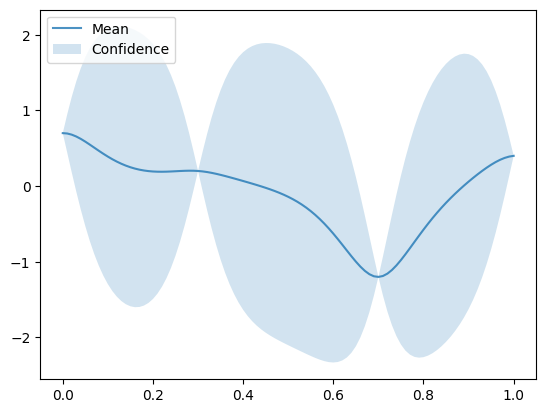

In [70]:
test_x = torch.linspace(0, 1, 101)
with torch.no_grad():
        
    # # Plot the objective function at the test points
    # plt.plot(test_x.cpu().numpy(), objective_function(test_x.view(-1,1)).detach().numpy(), 'tab:grey', alpha=0.6)

    # Calculate the posterior at the test points
    posterior = model.posterior(test_x.unsqueeze(1).unsqueeze(1))

    # Get upper and lower confidence bounds (2 standard deviations from the mean)
    mean = posterior.mean.squeeze(-1).squeeze(-1).cpu().numpy()
    lower, upper = posterior.mvn.confidence_region()
    lower = lower.squeeze(-1).squeeze(-1).cpu().numpy()
    upper = upper.squeeze(-1).squeeze(-1).cpu().numpy()
    # # Plot training points as black stars
    # plt.plot(train_x.cpu().numpy(), train_y.cpu().numpy(), 'k*', alpha=0.8)
    # Plot posterior means as blue line
    plt.plot(test_x.cpu().numpy(), mean, alpha=0.8)
    # Shade between the lower and upper confidence bounds
    plt.fill_between(test_x.cpu().numpy(), lower, upper, alpha=0.2)
    

plt.legend(['Mean', 'Confidence'], loc="upper left")

In [71]:
test_x.cpu().numpy(), mean, lower, upper

(array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
        0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
        0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
        0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
        0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
        0.99, 1.  ]),
 array([ 0.7       ,  0.69522183,  0.67981446,  0.65539073,  0.62395843,
         0.58758053,  0.54817993,  0.50743924,  0.46676179,  0.42727001,
         0.38982524,  0.35505833,  0.32340415,  0.29513567,  0.27039501,
         0.24922012,  0.2315665 ,  0.21732369,  0.20632676,  0.19836317,
         0.19317528,

In [72]:
import numpy as np
# Reshape or transpose if necessary (depends on how you want to align them)
arrays_combined = np.column_stack((test_x.cpu().numpy().flatten(), mean.flatten(), lower.flatten(), upper.flatten()))

# Reshape back to have 4 columns, one for each original array
# arrays_combined_reshaped = arrays_combined.reshape(-1, 4)

# Save to CSV
np.savetxt('gp_posterior.csv', arrays_combined, delimiter=',', fmt='%f', header='x, mean, lower, upper')

# fmt='%d' is used to format the numbers as integers, change it according to your data type.

In [73]:
arrays_combined

array([[ 0.        ,  0.7       ,  0.69998   ,  0.70002   ],
       [ 0.01      ,  0.69522183,  0.43921279,  0.95123088],
       [ 0.02      ,  0.67981446,  0.17837926,  1.18124966],
       [ 0.03      ,  0.65539073, -0.07372647,  1.38450794],
       [ 0.04      ,  0.62395843, -0.31087198,  1.55878883],
       [ 0.05      ,  0.58758053, -0.52901436,  1.70417543],
       [ 0.06      ,  0.54817993, -0.72588774,  1.8222476 ],
       [ 0.07      ,  0.50743924, -0.90058845,  1.91546692],
       [ 0.08      ,  0.46676179, -1.05319399,  1.98671757],
       [ 0.09      ,  0.42727001, -1.18443357,  2.0389736 ],
       [ 0.1       ,  0.38982524, -1.2954154 ,  2.07506588],
       [ 0.11      ,  0.35505833, -1.3874086 ,  2.09752525],
       [ 0.12      ,  0.32340415, -1.46167385,  2.10848215],
       [ 0.13      ,  0.29513567, -1.51933545,  2.1096068 ],
       [ 0.14      ,  0.27039501, -1.56128749,  2.10207751],
       [ 0.15      ,  0.24922012, -1.58812791,  2.08656814],
       [ 0.16      ,  0.